In [4]:
import nltk
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [5]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aliyi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aliyi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aliyi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
f = open("data.txt", "r")
text = f.read()

In [7]:
text[:1000]

"The Project Gutenberg EBook of Man to Man, by Jackson Gregory\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Man to Man\n\nAuthor: Jackson Gregory\n\nRelease Date: July 29, 2006 [EBook #18933]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK MAN TO MAN ***\n\n\n\n\nProduced by Al Haines\n\n\n\n\n\n\n\n\n\n\n[Frontispiece: The blazing heat was such that men and horses and steers\nsuffered terribly.]\n\n\n\n\n\n\nMAN TO MAN\n\n\nBY\n\nJACKSON GREGORY\n\n\n\nAUTHOR OF\n\nJUDITH OF BLUE LAKE RANCH, THE BELLS OF SAN JUAN, SIX FEET FOUR, ETC.\n\n\n\n\nILLUSTRATED BY\n\nJ. G. SHEPHERD\n\n\n\n\n\nGROSSET & DUNLAP\n\nPUBLISHERS -------- NEW YORK\n\n\n\n\nCOPYRIGHT, 1920, BY\n\nCHARLES SCRIBNER'S SONS\n\n\nPublished October, 1920\n\n\n\n\nCONTENTS\n\n\nCHAPTER

In [8]:
len(text)  # karakter sayisi

436574

**Sentence Tokenize**

In [9]:
sentences = sent_tokenize(text.lower())

In [10]:
len(sentences)  # cümle sayisi

5551

In [11]:
sentences[0:2]

['the project gutenberg ebook of man to man, by jackson gregory\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.',
 'you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.org\n\n\ntitle: man to man\n\nauthor: jackson gregory\n\nrelease date: july 29, 2006 [ebook #18933]\n\nlanguage: english\n\n\n*** start of this project gutenberg ebook man to man ***\n\n\n\n\nproduced by al haines\n\n\n\n\n\n\n\n\n\n\n[frontispiece: the blazing heat was such that men and horses and steers\nsuffered terribly.]']

In [12]:
corpus = []
for i in sentences:
    sent = word_tokenize(i)
    corpus.append(sent)

In [13]:
corpus[0:1]

[['the',
  'project',
  'gutenberg',
  'ebook',
  'of',
  'man',
  'to',
  'man',
  ',',
  'by',
  'jackson',
  'gregory',
  'this',
  'ebook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever',
  '.']]

**Word Tokenization of words**

In [14]:
corpus = word_tokenize(text.lower())  # tüm texti kelimelere (token) ayiriyor

In [15]:
len(corpus)

97042

In [16]:
corpus[:10]

['the', 'project', 'gutenberg', 'ebook', 'of', 'man', 'to', 'man', ',', 'by']

- We can implement tokenization even with split() function.

In [17]:
corpus_alt = text.lower().split()

In [18]:
len(corpus_alt)  # noktalama isaretlerini almiyor

78078

In [19]:
corpus_alt[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'man',
 'to',
 'man,',
 'by',
 'jackson']

**Remove Punctuation and numbers and chars like "*", "#"**

In [20]:
corpus_1 = [w for w in corpus if w.isalpha()]  # isalpha() karakter tabanli mi demek.

In [21]:
len(corpus_1)

77105

**Remove Stopwords**

In [22]:
stop_words = stopwords.words("english")

In [23]:
corpus_2 = [t for t in corpus_1 if t not in stop_words]

In [24]:
len(corpus_2)

38117

In [25]:
corpus_2[:10]

['project',
 'gutenberg',
 'ebook',
 'man',
 'man',
 'jackson',
 'gregory',
 'ebook',
 'use',
 'anyone']

**stemming**

In [26]:
st = PorterStemmer()  # ekli kelimelerin köküne inmeye calisiyor

In [27]:
corpus_3 = [st.stem(t) for t in corpus_2]

In [28]:
len(corpus_3)

38117

**lemma**

In [29]:
lem = WordNetLemmatizer()  # biraz daha akilli köke iniyor, stemmin üzerine lemma yapilmaz, lemma stemmingden daha iyi

In [30]:
corpus_4 = [lem.lemmatize(t) for t in corpus_2]

In [31]:
len(corpus_4)

38117

**Most Common Words**

In [32]:
print(Counter(corpus_4).most_common(5))

[('steve', 542), ('packard', 541), ('blenham', 524), ('man', 445), ('terry', 409)]


**joinning**

In [33]:
corpus_4[:20]

['project',
 'gutenberg',
 'ebook',
 'man',
 'man',
 'jackson',
 'gregory',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restriction',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'term']

In [34]:
original = " ".join(corpus_4)

In [35]:
original[:100]

'project gutenberg ebook man man jackson gregory ebook use anyone anywhere cost almost restriction wh'

**Part of Speech Tagging (PoST)**

In [36]:
# cümlenin ögeleri (noun, pronoun, verb, adjective, adverb, preposition, conjunction, and interjection)
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aliyi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [37]:
text="Steven Paul Jobs (/dʒɒbz/; February 24, 1955 – October 5, 2011) was an American business magnate, industrial designer, investor, and media proprietor. He was the chairman, chief executive officer (CEO), and co-founder of Apple Inc., the chairman and majority shareholder of Pixar, a member of The Walt Disney Company's board of directors following its acquisition of Pixar, and the founder, chairman, and CEO of NeXT. Jobs is widely recognized as a pioneer of the personal computer revolution of the 1970s and 1980s, along with Apple co-founder Steve Wozniak."

In [38]:
text_tokens = nltk.word_tokenize(text.lower())
tokens_without_punc = [w for w in text_tokens if w.isalpha()]
tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

In [39]:
text_cleaned[:10]

['steven',
 'paul',
 'job',
 'february',
 'october',
 'american',
 'business',
 'magnate',
 'industrial',
 'designer']

In [40]:
original=' '.join(text_cleaned)
original

'steven paul job february october american business magnate industrial designer investor medium proprietor chairman chief executive officer ceo apple chairman majority shareholder pixar member walt disney company board director following acquisition pixar founder chairman ceo next job widely recognized pioneer personal computer revolution along apple steve wozniak'

In [41]:
tagged = nltk.pos_tag(text_cleaned)

In [42]:
tagged

[('steven', 'NN'),
 ('paul', 'NNS'),
 ('job', 'NN'),
 ('february', 'JJ'),
 ('october', 'JJ'),
 ('american', 'JJ'),
 ('business', 'NN'),
 ('magnate', 'NN'),
 ('industrial', 'JJ'),
 ('designer', 'NN'),
 ('investor', 'NN'),
 ('medium', 'NN'),
 ('proprietor', 'NN'),
 ('chairman', 'NN'),
 ('chief', 'JJ'),
 ('executive', 'JJ'),
 ('officer', 'NN'),
 ('ceo', 'NN'),
 ('apple', 'NN'),
 ('chairman', 'NN'),
 ('majority', 'NN'),
 ('shareholder', 'NN'),
 ('pixar', 'NN'),
 ('member', 'NN'),
 ('walt', 'NN'),
 ('disney', 'NN'),
 ('company', 'NN'),
 ('board', 'NN'),
 ('director', 'NN'),
 ('following', 'VBG'),
 ('acquisition', 'NN'),
 ('pixar', 'FW'),
 ('founder', 'NN'),
 ('chairman', 'NN'),
 ('ceo', 'VBP'),
 ('next', 'JJ'),
 ('job', 'NN'),
 ('widely', 'RB'),
 ('recognized', 'VBN'),
 ('pioneer', 'NN'),
 ('personal', 'JJ'),
 ('computer', 'NN'),
 ('revolution', 'NN'),
 ('along', 'IN'),
 ('apple', 'NN'),
 ('steve', 'VBP'),
 ('wozniak', 'NN')]

In [43]:
"""
CC     coordinating conjunction
CD     cardinal digit
DT     determiner
EX     existential there (like: "there is" ... think of it like "there exists")
FW     foreign word
IN     preposition/subordinating conjunction
JJ     adjective 'big'
JJR    adjective, comparative 'bigger'
JJS    adjective, superlative 'biggest'
LS     list marker 1)
MD     modal could, will
NN     noun, singular 'desk'
NNS    noun plural 'desks'
NNP    proper noun, singular 'Harrison'
NNPS   proper noun, plural 'Americans'
PDT    predeterminer 'all the kids'
POS    possessive ending parent's
PRP    personal pronoun I, he, she
PRP$   possessive pronoun my, his, hers
RB     adverb very, silently,
RBR    adverb, comparative better
RBS    adverb, superlative best
RP     particle give up
TO     to go 'to' the store.
UH     interjection errrrrrrrm
VB     verb, base form take
VBD    verb, past tense took
VBG    verb, gerund/present participle taking
VBN    verb, past participle taken
VBP    verb, sing. present, non-3d take
VBZ    verb, 3rd person sing. present takes
WDT    wh-determiner which
WP     wh-pronoun who, what
WP$    possessive wh-pronoun whose
WRB    wh-abverb where, when
""";

**NER (Named Entity Recognition)**

In [44]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\aliyi\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [45]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\aliyi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [46]:
named_ent = nltk.ne_chunk(tagged)

In [47]:
print(named_ent)

(S
  steven/NN
  paul/NNS
  job/NN
  february/JJ
  october/JJ
  american/JJ
  business/NN
  magnate/NN
  industrial/JJ
  designer/NN
  investor/NN
  medium/NN
  proprietor/NN
  chairman/NN
  chief/JJ
  executive/JJ
  officer/NN
  ceo/NN
  apple/NN
  chairman/NN
  majority/NN
  shareholder/NN
  pixar/NN
  member/NN
  walt/NN
  disney/NN
  company/NN
  board/NN
  director/NN
  following/VBG
  acquisition/NN
  pixar/FW
  founder/NN
  chairman/NN
  ceo/VBP
  next/JJ
  job/NN
  widely/RB
  recognized/VBN
  pioneer/NN
  personal/JJ
  computer/NN
  revolution/NN
  along/IN
  apple/NN
  steve/VBP
  wozniak/NN)


In [48]:
named_ent.draw()

**word cloud**

In [49]:
#!pip install wordcloud

In [50]:
from wordcloud import WordCloud

In [51]:
original = " ".join(corpus_4)

In [56]:
wordcloud = WordCloud(background_color = "white", max_words=500)
wordcloud.generate(original)

In [57]:
import matplotlib.pyplot as plt

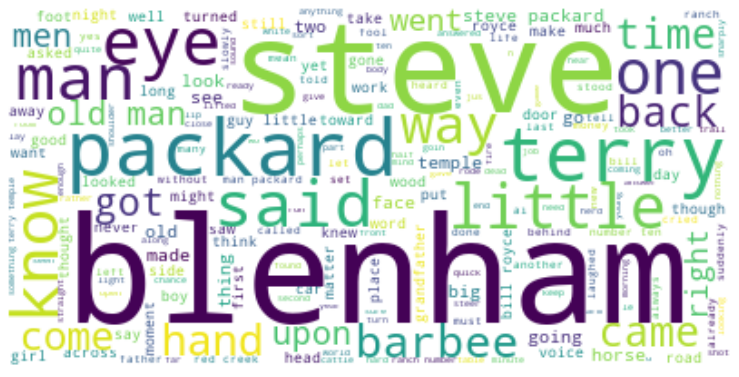

In [58]:
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()